## Now we define the basic model and load the orientation and lithological information
mj: We inset the model dimensions as once reprojects the edge pixels of the topography are undefined. Probably doesn't need to be that extreme (unit is metres). Could use parameter <b>maxtopo</b> to 

In [1]:
import pandas as pd
mname='hams2' 

contacts=pd.read_csv('../test_data2/output/'+mname+'_contacts4.csv',",")
actual_cpts=set(contacts['formation'])

#contacts2=contacts.loc[contacts['formation'].isin(actual_cpts)]  
#contacts2.to_csv('../test_data2/output/'+mname+'_contacts5.csv',index=False)
 
orientations=pd.read_csv('../test_data2/output/'+mname+'_orientations.csv',",")
orientations2=orientations.loc[orientations['formation'].isin(actual_cpts)]  
orientations2.to_csv('../test_data2/output/'+mname+'_orientations2.csv',index=False)


In [2]:
import sys, os
sys.path.append("../../../../gempy")
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu"

mname='hams2' 
import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os
geo_model = gp.create_model('gp_test')
# extents=[   np.round_(geom_rp['coordinates'][0][0][0]+step_in, decimals=-3),
#             np.round_(geom_rp['coordinates'][0][2][0]-step_in, decimals=-3),
#             np.round_(geom_rp['coordinates'][0][1][1]+step_in, decimals=-3),
#             np.round_(geom_rp['coordinates'][0][0][1]-step_in, decimals=-3),
#             model_base,1200]

#print(extents)
gp.init_data(geo_model, extent=[502536, 600652, 7.458e6, 7.56e6, -3000, 1200],
    resolution = (50,50,50), 
      path_o = '../test_data2/output/hams2_orientations2.csv',
      path_i = '../test_data2/output/hams2_contacts4.csv', default_values=True); #%%

Active grids: ['regular']


## Show example lithological points

In [3]:
gp.get_data(geo_model, 'surface_points')['surface'].value_counts()

P__HAb_cib       105
A_HAm_cib         61
A_HAS_xsl_ci      60
A_FOj_xs_b        54
A_HAd_kd          44
P__HAw_fr         42
P__HAo_ci         27
A_FOu_bbo         25
P__HAj_xci_od     25
A_FOh_xs_f        19
P__SKq_stq        18
A_FOo_bbo         16
A_FOp_bs          15
P__TK_s           14
P__TKa_xs_k       14
P__WYm_sp         13
P__TKo_stq         7
A_FOr_b            6
P__SKb_bb          2
P__WYa_st          2
P__TKk_sf          1
basement           0
Name: surface, dtype: int64

## Show example orientations

In [4]:
gp.get_data(geo_model, 'orientations')['surface'].value_counts()

A_FOj_xs_b       21
A_FOh_xs_f       20
P__HAb_cib       16
A_HAm_cib        13
A_FOu_bbo         9
A_FOp_bs          7
A_HAS_xsl_ci      6
P__SKq_stq        5
P__TKk_sf         3
A_HAd_kd          3
P__HAj_xci_od     3
P__TK_s           2
P__HAo_ci         1
P__WYm_sp         1
P__WYa_st         1
P__SKb_bb         0
P__HAw_fr         0
P__TKo_stq        0
P__TKa_xs_k       0
A_FOr_b           0
A_FOo_bbo         0
basement          0
Name: surface, dtype: int64

## Plot some of this data

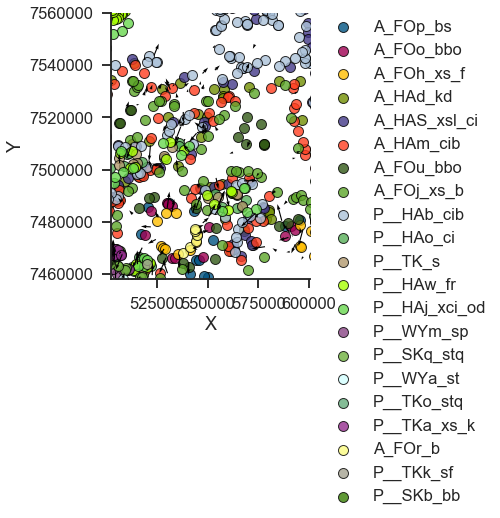

In [5]:
%matplotlib inline
gp.plot.plot_data(geo_model, direction='z');

## Load reprojected topgraphy to model

C:\Users\00073294\Dropbox\1_Jupyter_notebooks\map2loop\notebooks
Cropped raster to geo_model.grid.extent.
[ 502536  600652 7458000 7560000] [115 110]
storing converted file...
Active grids: ['regular' 'topography']


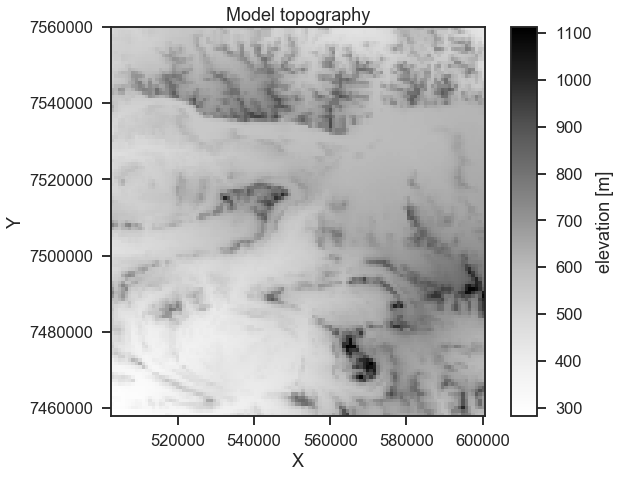

In [6]:
print(os.getcwd())
fp = '../test_data2/dtm/hams2_dtm_rp.tif'
geo_model.set_topography(source='gdal',filepath=fp)

## Load stratigraphic Series

f=open('../test_data2/tmp/hams2_groups.csv',"r")
contents =f.readlines()
f.close

# # This is not necessary all data objects are created and linked to geo_model on the init call!!!

# # faults = gp.Faults()
# # series = gp.Series(faults)
# # series.df

ngroups=(contents[0]).split(" ")
ngroups=int(ngroups[1])
groups=[]

for i in range (1,int(ngroups)+1):
     groups.append(contents[i].replace("\n",""))
#     geo_model.add_series(contents[i].replace("\n",""))

# geo_model.delete_series(['Default series', 'Basement'])



## Load surfaces and assign to series

In [7]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,A_FOp_bs,Default series,1,False,#015482,1
1,A_FOo_bbo,Default series,2,False,#9f0052,2
2,A_FOh_xs_f,Default series,3,False,#ffbe00,3
3,A_HAd_kd,Default series,4,False,#728f02,4
4,A_HAS_xsl_ci,Default series,5,False,#443988,5
5,A_HAm_cib,Default series,6,False,#ff3f20,6
6,A_FOu_bbo,Default series,7,False,#325916,7
7,A_FOj_xs_b,Default series,8,False,#5DA629,8
8,P__HAb_cib,Default series,9,False,#acc2d9,9
9,P__HAo_ci,Default series,10,False,#56ae57,10


In [8]:
geo_model.series

,order_series,BottomRelation
Default series,1,Erosion
Basement,2,Erosion


In [9]:
print(os.getcwd())

for i in range(0,ngroups):
    f=open('../test_data2/tmp/'+groups[i]+'.csv',"r")
    contents =f.readlines()
    nformations=str(contents[0])
    nformations=nformations.split(" ")
    nformations=int(nformations[1].replace("\n",""))

    for j in range (1,int(nformations)+1):
        print(contents[j].replace("\n","").replace("-","_"))
        #geo_model.add_surfaces(contents[j].replace("\n",""))
        #d={groups[i]:contents[j].replace("\n","")}
        gp.map_series_to_surfaces(geo_model, {groups[i]:(contents[j].replace("\n","").replace("-","_"))},
                                  set_series=True, remove_unused_series=True)
        #geo_model.surfaces.map_series({groups[i]:(contents[j].replace("\n",""))}, )
    f.close

C:\Users\00073294\Dropbox\1_Jupyter_notebooks\map2loop\notebooks
P__WYa_st
P__WYm_sp
P__WYd_kd
P__SKq_stq
P__SKb_bb
P__TK_s
P__TKa_xs_k
P__TKo_stq
P__TKk_sf
P__HAo_ci
P__HAw_fr
P__HAj_xci_od
P__HAb_cib
A_HAS_xsl_ci
A_HAd_kd
A_HAm_cib
A_FOj_xs_b
A_FOu_bbo
A_FOp_bs
A_FOo_bbo
A_FOh_xs_f


ValueError: operands could not be broadcast together with shapes (6,) (5,) 

In [10]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
13,P__WYm_sp,Default series,1,False,#894585,1
15,P__WYa_st,Default series,2,False,#d4ffff,2
20,P__SKb_bb,Shingle_Creek_Group,1,False,#388004,3
14,P__SKq_stq,Shingle_Creek_Group,2,False,#70b23f,4
19,P__TKk_sf,Turee_Creek_Group,1,False,#a5a391,5
16,P__TKo_stq,Turee_Creek_Group,2,False,#65ab7c,6
17,P__TKa_xs_k,Turee_Creek_Group,3,False,#952e8f,7
10,P__TK_s,Turee_Creek_Group,4,False,#b2996e,8
5,A_HAm_cib,Hamersley_Group,1,False,#ff3f20,9
3,A_HAd_kd,Hamersley_Group,2,False,#728f02,10


In [11]:
geo_model.surface_points

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
408,511530.255956,7.455348e+06,304,0.321190,0.250100,0.498401,P__WYm_sp,Default series,1,1,1.000000e-08
409,513879.826545,7.456447e+06,312,0.331695,0.255015,0.498437,P__WYm_sp,Default series,1,1,1.000000e-08
410,518064.614102,7.457010e+06,346,0.350407,0.257530,0.498589,P__WYm_sp,Default series,1,1,1.000000e-08
447,505545.593518,7.460081e+06,300,0.294430,0.271262,0.498383,P__WYm_sp,Default series,1,1,1.000000e-08
448,500160.091928,7.461409e+06,285,0.270349,0.277202,0.498316,P__WYm_sp,Default series,1,1,1.000000e-08
449,509256.012199,7.461530e+06,353,0.311021,0.277744,0.498620,P__WYm_sp,Default series,1,1,1.000000e-08
450,509994.531892,7.461589e+06,333,0.314323,0.278004,0.498531,P__WYm_sp,Default series,1,1,1.000000e-08
451,510343.842064,7.461632e+06,333,0.315885,0.278200,0.498531,P__WYm_sp,Default series,1,1,1.000000e-08
452,510758.777184,7.461685e+06,317,0.317740,0.278433,0.498459,P__WYm_sp,Default series,1,1,1.000000e-08
453,511099.675060,7.461723e+06,317,0.319264,0.278606,0.498459,P__WYm_sp,Default series,1,1,1.000000e-08


In [12]:
geo_model.orientations

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
2,504669.323074,7.461017e+06,299,0.290512,0.275448,0.498379,-1.639990e-02,-0.939550,0.342020,70,181,1,P__WYm_sp,Default series,1,1,0.01
110,507893.288924,7.457420e+06,293,0.304927,0.259367,0.498352,1.164894e-01,0.406247,0.906308,25,16,1,P__WYa_st,Default series,2,1,0.01
3,517319.479838,7.458552e+06,338,0.347076,0.264424,0.498553,-5.653432e-02,-0.164188,0.984808,10,199,1,P__SKq_stq,Shingle_Creek_Group,4,2,0.01
8,503809.705274,7.463490e+06,296,0.286668,0.286505,0.498365,4.852505e-02,0.925913,0.374607,68,3,1,P__SKq_stq,Shingle_Creek_Group,4,2,0.01
9,502536.429960,7.468201e+06,460,0.280975,0.307572,0.499098,-1.501229e-01,-0.231169,0.961262,16,213,1,P__SKq_stq,Shingle_Creek_Group,4,2,0.01
10,502536.419086,7.469580e+06,361,0.280975,0.313736,0.498656,-2.173269e-02,-0.206773,0.978148,12,186,1,P__SKq_stq,Shingle_Creek_Group,4,2,0.01
12,507187.876941,7.468501e+06,332,0.301773,0.308914,0.498526,-1.020678e-01,-0.140484,0.984808,10,216,1,P__SKq_stq,Shingle_Creek_Group,4,2,0.01
6,507945.284967,7.467496e+06,437,0.305160,0.304418,0.498996,-3.313588e-01,-0.780632,0.529919,58,203,1,P__TKk_sf,Turee_Creek_Group,5,3,0.01
7,503517.659190,7.466604e+06,410,0.285362,0.300429,0.498875,1.000000e-12,0.866025,0.500000,60,0,1,P__TKk_sf,Turee_Creek_Group,5,3,0.01
11,503306.793169,7.465432e+06,311,0.284419,0.295189,0.498432,9.997575e-13,0.990268,0.139173,82,360,1,P__TKk_sf,Turee_Creek_Group,5,3,0.01


## Every surface need at least two surfaces points fix:

In gempy to do everything vectorial we always need at least a reference point and a--I call it--rest point (non-reference point). Usually I raise an error. With this fix you can add a point per surface on the same location as the reference point. I will add this in the next release (https://github.com/cgre-aachen/gempy/issues/211).

In [13]:
id_only_one_bool = geo_model.surface_points.df['id'].value_counts() == 1

In [14]:
id_only_one_bool = geo_model.surface_points.df['id'].value_counts() == 1
id_only_one = id_only_one_bool.index[id_only_one_bool]
single_vals = geo_model.surface_points.df[geo_model.surface_points.df['id'].isin(id_only_one)]
for idx, vals in single_vals.iterrows():
    geo_model.add_surface_points(vals['X'], vals['Y'], vals['Z'], vals['surface'])

## Set Interpolation Data

### Float 32

In [14]:
geo_model.additional_data.options.df['dtype'] = 'float32'
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

Compiling theano function...


/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/gof/cc.py:968: UserWarning: Your g++ compiler fails to compile OpenMP code. We know this happen with some version of the EPD mingw compiler and LLVM compiler on Mac OS X. We disable openmp everywhere in Theano. To remove this warning set the theano flags `openmp` to False.
  ret += x.c_compile_args()


Compilation Done!


/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=4.39805e-11): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=3.06245e-11): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=1.09024e-16): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=4.61544e-21): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=5.75266e-19): result may not be accurate.
  rval = scipy.linalg.solve(A

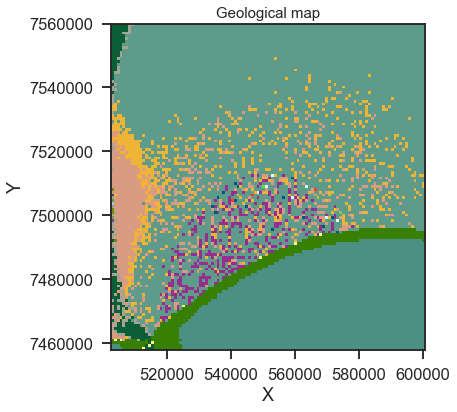

In [15]:
gp.compute_model(geo_model)
gp.plot.plot_map(geo_model, show_data=False, contour_lines=False)

### Float64

In [15]:
geo_model.additional_data.options.df['dtype'] = 'float64'

In [16]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

Compiling theano function...
Compilation Done!


## Provide summary data on model

In [17]:
geo_model.additional_data.structure_data

,values
isLith,True
isFault,False
number faults,0
number surfaces,21
number series,5
number surfaces per series,"[2, 2, 4, 7, 6]"
len surfaces surface_points,"[13, 2, 2, 18, 2, 7, 14, 14, 61, 44, 60, 105, ..."
len series surface_points,"[15, 20, 37, 364, 135]"
len series orientations,"[2, 5, 5, 42, 57]"


## Calculate Model

In [18]:
gp.compute_model(geo_model)

C:\Users\00073294\AppData\Local\Continuum\anaconda3\lib\site-packages\gempy\core\solution.py:253: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e))



Lithology ids 
  [ 8.  8.  8. ... 12. 12. 12.] 

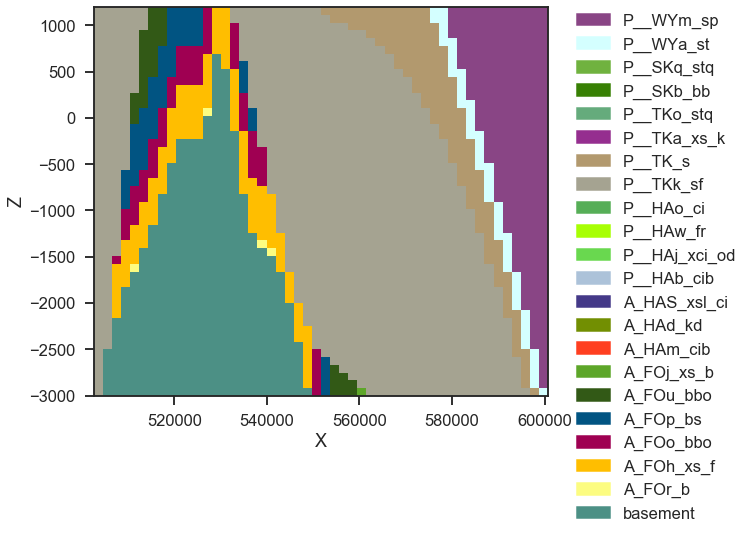

In [19]:
gp.plot.plot_section(geo_model, ve=20)

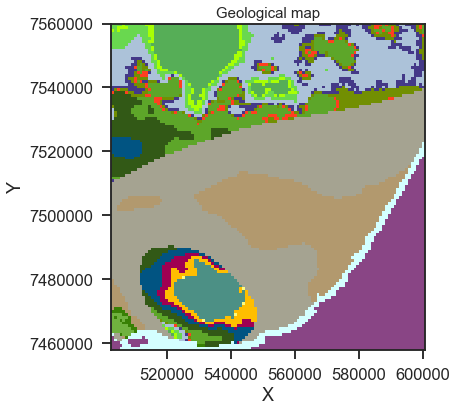

In [20]:
gp.plot.plot_map(geo_model, show_data=False, contour_lines=False)

## Extract surfaces to visualize in 3D renderers

In [21]:
ver , sim = gp.get_surfaces(geo_model)

## Visualise model

In [23]:
gp.plot.plot_3D(geo_model,  render_data=False)

AttributeError: 'GemPyvtkInteract' object has no attribute 'topo_visualization'

## Export model to vtk files

In [ ]:
from gempy import plot
gp.plot.export_to_vtk(geo_model, path='./test_data2/vtk/', name=mname+'.vtk', voxels=False, block=None, surfaces=True)